In [1]:
# importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

%matplotlib inline

In [2]:
#importing data
df=pd.read_csv("Jumia Phones Full Data3.csv")

In [3]:
#data assessment, cleaning, understanding the data
df.head()

,Name,Price
0,"Infinix Smart 6, 6.6"", 2GB RAM, 32GB, 5000mAh,...","KSh 9,999"
1,"XIAOMI Redmi A1+, 6.52"", 2GB+32GB, 8.0MP, 5000...","KSh 8,999"
2,"XIAOMI Redmi 10A, 6.53"", 3GB+64GB, 13.0MP, 500...","KSh 12,999"
3,"Infinix Smart 6, 6.6"", 32GB + 2GB RAM (Dual SI...","KSh 9,799"
4,"Tecno Spark 8P, 6.6"", 64GB + 4GB RAM (Dual SIM...","KSh 13,830"


In [4]:
df.tail()

,Name,Price
1995,"Samsung Galaxy A03 Core //Disp 6.5"" //32GB+2GB...","KSh 11,799"
1996,"Itel A33 Plus 5"" 1 + 16GB, Fingerprint, Face ...","KSh 6,999"
1997,"Tecno CAMON 18i, 6.6"", [ 4GB RAM + 128GB ROM ]...","KSh 20,862"
1998,"Samsung Galaxy M52 5G, 6.7"", 6GB RAM + 128GB (...","KSh 37,499"
1999,"Infinix Smart 6 Plus 6.6"", 2GB RAM + 32GB ROM,...","KSh 12,699"


In [5]:
df.dtypes

Name     object
Price    object
dtype: object

In [6]:
df.shape

(2000, 2)

In [7]:
#checking for missing observations
df.isna().sum()

Name     0
Price    0
dtype: int64

In [8]:
#checking duplicates
df.duplicated().sum()

24

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Name    2000 non-null   object
 1   Price   2000 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB


In [10]:
df.sample(5)

,Name,Price
1750,"XIAOMI Redmi 10A, 6.53"", 3GB + 64GB, 13MP, 500...","KSh 15,299"
1581,"Itel 5626 2.8"" Display –Camera --- 2500mAh -Tr...","KSh 2,560"
983,"Realme C21Y, 6.5"", 4GB RAM+64GB (Dual SIM), 50...","KSh 16,299"
512,"Bontel 3310,1.77"" Display,fm Radio,mp3,mp4 Sup...","KSh 1,180"
290,"Tecno Spark 9T, 6.6"", 128GB + 4GB RAM (Dual SI...","KSh 19,949"


In [11]:
#are there issues observed?
#duplicate entries
#erroneous data types such as object for numbers
#irrelevant data, non-phone information
#maybe a rating column should be present

In [12]:
#data cleaning
import copy
jumia=df.copy() #making a copy of the data frame

In [13]:
jumia.drop_duplicates(inplace=True)

In [14]:
jumia.duplicated().sum()

0

In [15]:
jumia.shape

(1976, 2)

In [16]:
#converting price column to integer
jumia['Price']=jumia['Price'].str[4:]
jumia['Price']=jumia['Price'].str.replace(',','')
jumia.head()

,Name,Price
0,"Infinix Smart 6, 6.6"", 2GB RAM, 32GB, 5000mAh,...",9999
1,"XIAOMI Redmi A1+, 6.52"", 2GB+32GB, 8.0MP, 5000...",8999
2,"XIAOMI Redmi 10A, 6.53"", 3GB+64GB, 13.0MP, 500...",12999
3,"Infinix Smart 6, 6.6"", 32GB + 2GB RAM (Dual SI...",9799
4,"Tecno Spark 8P, 6.6"", 64GB + 4GB RAM (Dual SIM...",13830


In [17]:
jumia['Price']=jumia['Price'].astype(int)
jumia['Price'].dtype

dtype('int32')

In [18]:
jumia.sample(5)

,Name,Price
206,Generic Bhawsar Jakhme Pink Ruz Ointment- 100%...,854
676,"Itel 5615 - 2.4"" Display- 2500mAh -Triple Sim...",2150
1171,"Nokia X10, 6.67"", [6GB + 128GB], DUAL SIM, 48M...",21699
1803,"Huawei P20 Lite 5.8 Inch Display, 16 MP, DUAL-...",17499
330,"Realme C30s, 6.5"", 32GB + 2GB RAM, (Dual SIM),...",12349


In [19]:
jumia.shape

(1976, 2)

In [20]:
#indexing rows where the price is less than 6300 to spot accesories
print(jumia[jumia.Price<=6300])

                                                   Name  Price
28    X Tigi V8 Max - 3.5'' - Dual SIM -  ROM 8GB - ...   3599
32    X Tigi S23 Mini - 1.77'' - Big Torch - Big Spe...   1349
36    X Tigi S23 Mini - 1.77'' - Big Torch - Big Spe...   1349
47    Samsung Guru Music 2 (SM-B310E)  - Dual SIM - ...   2659
51    Itel It 2160, 1.77'' Blue, Fm Radio,1000 MAh,D...   1299
...                                                 ...    ...
1979  SQ LS 820 -Fixed Wireless Desktop Telephone (D...   3899
1981  Sowhat S12 5.72 INCH SCREEN,4000MAH BATTERY,8 ...   5300
1985  Itel 5081-2.40 ", Triple Sim, Button Phone,(12...   2299
1987  Itel It 2160 - 1000mAH, (Dual SIM),TORCH, FM R...   1390
1991  X Tigi S23 Mini//Torch ,,,Speaker,,FM Radio,,B...   1550

[487 rows x 2 columns]


In [21]:
#removing what is not a phone
jumia=jumia[~(jumia['Price']<6300)]

In [22]:
jumia.shape

(1489, 2)

In [23]:
jumia.to_csv("Jumia Phones Clean Data.csv",index=False)

In [24]:
#data preprocessing and feature extraction
from nltk.tokenize import word_tokenize #to create word tokens

In [25]:
#defining function to extract phone name
phone_brands=['infinix','xiaomi','tecno','samsung','oppo','apple',
             'blackview','vivo','huawei','itel','realme','nokia',
             'x tigi','poco','one plus']
def getbrand(name):
    name=name.lower() #converting to lower case
    word_tokens=word_tokenize(name) #splits each word in name
    brand=[char for char in word_tokens if char in phone_brands]
    return ''.join(brand)

In [ ]:
#defining function to extract phone name
#phone_brands=['1gb','2gb','4gb','6gb','3gb','8gb','12gb']
#def getbrand(name):
#    name=name.lower() #converting to lower case
#    word_tokens=word_tokenize(name) #splits each word in name
#    brand=[char for char in word_tokens if char in phone_brands]
#    return ''.join(brand)

In [26]:
import nltk
#nltk.download('punkt')

In [27]:
jumia['brand']=jumia['Name'].apply(getbrand)

In [28]:
jumia.sample(2)

,Name,Price,brand
1634,"Realme C30s, 6.5"", 64GB + 4GB, 8MP (Dual SIM) ...",15000,realme
1647,"Samsung Galaxy M32- 6.4"",128GB ROM+6GB RAM (Du...",24999,samsung


In [29]:
jumia.isna().sum()

Name     0
Price    0
brand    0
dtype: int64

In [30]:
jumia.sample(2)

,Name,Price,brand
1782,"Oppo A77, 6.56', 6GB RAM + 128GB, 48MP, 5000mA...",29000,oppo
226,"Tecno Spark 9 Pro, 6.6"", 128GB + 4GB RAM (Dual...",21849,tecno


In [31]:
#replacing empty cells with NaN
jumia2=jumia.replace('', np.nan)
jumia2.sample(2)

,Name,Price,brand
584,"Nokia G21, 6.5″, 128GB ROM+ 4GB RAM Dual SIM, ...",20698,nokia
933,"Tecno CAMON 19 Pro, 6.8"", 256GB+ 8GB (Dual SIM...",34899,tecno


In [32]:
#dropping the missing values
jumia2.dropna(subset=['brand'],inplace=True)

In [33]:
jumia2.sample(2)

,Name,Price,brand
149,"Tecno Spark 9, 6.6"" , 4GB RAM+64GB, 13MP, Dual...",16624,tecno
1354,"Samsung Galaxy M52 5G, 6.7"", 8GB RAM + 128GB (...",37690,samsung


In [34]:
jumia2.shape

(1448, 3)

In [35]:
jumia2['Name']=jumia2['Name'].str.replace('\s+\s','-')

<ipython-input-35-1f7bb57baf89>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  jumia2['Name']=jumia2['Name'].str.replace('\s+\s','-')


In [36]:
jumia2.sample(2)

,Name,Price,brand
928,"Nokia G21, 6.5″, 128GB + 4GB Dual SIM, 5050MAh...",20999,nokia
1087,"Samsung Galaxy F13, 6.6"", 4GB RAM + 64GB (Dual...",17999,samsung


In [37]:
#defining function to extract phone RAM
words = ['1gb','2gb','4gb','6gb','8gb','4ram','3gb','1 gb','6gbram','12gb','2G',
        '1 ram','4 gb','8 gb','2 gb','3 gb','6 gb','1ram','screen2gb','4gbram',
        '[8][+]','[4][+]','[6][+]','[1][\s][+]','8gm']

# mystring contains at least one of the words
def getram2(name):
    ram2=re.findall(r"\b({})\b".format('|'.join(words)), name, flags=re.IGNORECASE)
    return ''.join(ram2)

In [38]:
jumia2['ram_space2']=jumia2['Name'].apply(getram2)

In [39]:
jumia2.sample(2)

,Name,Price,brand,ram_space2
478,"XIAOMI Redmi 10C, 6.53'', [4GB RAM + 64GB], 4G...",17499,xiaomi,4GB
83,"Infinix Hot 12 Play, 6.82"", 64GB + 4GB RAM (Du...",15949,infinix,4GB


In [40]:
#replacing empty spaces with nan and counting
jumia2['ram_space2'].replace('',np.nan,inplace=True)
jumia2.isna().sum()

Name           0
Price          0
brand          0
ram_space2    29
dtype: int64

In [41]:
#defining function to get storage capacity
words = ['16gb','32gb','64gb','128gb','256gb','128gbrom','64rom','[32][+]',
         '16 GB','32 gb','64 gb','128 gb','256 gb','128g','[+][64]','64g[+]']
        #'1 ram','4 gb','8 gb','2 gb','3 gb','6 gb','1ram','screen2gb','4gbram',
        #'[8][+]','[4][+]','[6][+]','[1][\s][+]','8gm']

# mystring contains at least one of the words
def getrom(name):
    rom=re.findall(r"\b({})\b".format('|'.join(words)), name, flags=re.IGNORECASE)
    return ''.join(rom)

In [42]:
jumia2['storage']=jumia2['Name'].apply(getrom)

In [43]:
jumia2.sample(2)

,Name,Price,brand,ram_space2,storage
1739,"Nokia X10, [6GB + 128GB], DUAL SIM +-FREE QUAL...",21825,nokia,6GB,128GB
927,"Tecno Spark 9T, 6.6"", 64GB/4GB--13MP-(Dual SIM...",16200,tecno,4GB,64GB


In [44]:
#replacing empty spaces with nan and counting
jumia2['storage'].replace('',np.nan,inplace=True)
jumia2.isna().sum()

Name           0
Price          0
brand          0
ram_space2    29
storage       23
dtype: int64

In [45]:
jumia2.shape

(1448, 5)

In [46]:
#defining function to get battery size
words = ['5000mah','4230mah','4000mah','4750mah','4,020mah','6000mah','2500mh','5050 mah','4680 mah',
        '3240mah','4323mah','4500mah','-5000-','2400mah','4400mah','3000mah','3020mah','2500mah']

# mystring contains at least one of the words
def getbattery(name):
    battery=re.findall(r"\b({})\b".format('|'.join(words)), name, flags=re.IGNORECASE)
    return ''.join(battery)

In [47]:
jumia2['battery']=jumia2['Name'].apply(getbattery)

In [48]:
jumia2.sample(2)

,Name,Price,brand,ram_space2,storage,battery
225,"Infinix HOT 12i, 6.6'', 64GB + 3GB RAM,Dual SI...",16149,infinix,3GB,64GB,5000mAh
1449,"Tecno Spark 9T, 6.6"", 128GB + 4GB RAM (Dual SI...",18799,tecno,4GB,128GB,5000mAh


In [49]:
#replacing empty spaces with nan and counting
jumia2['battery'].replace('',np.nan,inplace=True)
jumia2.isna().sum()

Name            0
Price           0
brand           0
ram_space2     29
storage        23
battery       454
dtype: int64

In [50]:
#defining function to get screen size
words = ['6"','5"']

# mystring contains at least one of the words
def getscreen(name):
    screen=re.findall('([0-9]+[.]+[0-9]+|\d+["])',name)
    #screen=re.findall(r"\b({})\b".format('|'.join(words)), name, flags=re.IGNORECASE)
    return ''.join(screen)

In [51]:
jumia2['screen']=jumia2['Name'].apply(getscreen)

In [52]:
jumia2.sample(2)

,Name,Price,brand,ram_space2,storage,battery,screen
1941,"XIAOMI REDMI NOTE 11, 6.43"", [4GB + 128GB], 50...",24499,xiaomi,4GB,128GB,NaN,6.43
750,Samsung Galaxy A03s 6.5″ Display 64GBROM+ 4GBR...,16500,samsung,4GBRAM,NaN,NaN,6.5


In [53]:
#replacing empty spaces with nan and counting
jumia2['screen'].replace('',np.nan,inplace=True)
jumia2.isna().sum()

Name            0
Price           0
brand           0
ram_space2     29
storage        23
battery       454
screen         62
dtype: int64

In [54]:
###removing unnecessary strings in some columns
jumia2.head()

,Name,Price,brand,ram_space2,storage,battery,screen
0,"Infinix Smart 6, 6.6"", 2GB RAM, 32GB, 5000mAh,...",9999,infinix,2GB,32GB,5000mAh,6.6
1,"XIAOMI Redmi A1+, 6.52"", 2GB+32GB, 8.0MP, 5000...",8999,xiaomi,2GB,32GB,5000mAh,6.528.0
2,"XIAOMI Redmi 10A, 6.53"", 3GB+64GB, 13.0MP, 500...",12999,xiaomi,3GB,64GB,5000mAh,6.5313.0
3,"Infinix Smart 6, 6.6"", 32GB + 2GB RAM (Dual SI...",9799,infinix,2GB,32GB,5000mAh,6.6
4,"Tecno Spark 8P, 6.6"", 64GB + 4GB RAM (Dual SIM...",13830,tecno,4GB,64GB,5000mAh,6.6


In [55]:
#removing unwanted parts of RAM
jumia2['ram_space2']=jumia2['ram_space2'].str.replace("GB",'')
jumia2['ram_space2']=jumia2['ram_space2'].str.replace("gb",'')
jumia2['ram_space2']=jumia2['ram_space2'].str.replace("RAM",'')
jumia2['ram_space2']=jumia2['ram_space2'].str.replace("+",'')
jumia2['ram_space2']=jumia2['ram_space2'].str.replace("GM",'gb')
jumia2['ram_space2']=jumia2['ram_space2'].str.replace("G",'gb')
jumia2['ram_space2']=jumia2['ram_space2'].str.replace("screen2",'2gb')
jumia2['ram_space2']=jumia2['ram_space2'].str.replace("24",'2gb')
jumia2['ram_space2']=jumia2['ram_space2'].str.replace("28",'2gb')
jumia2['ram_space2']=jumia2['ram_space2'].str.replace("26",'2gb')
jumia2['ram_space2']=jumia2['ram_space2'].str.replace("23",'2gb')
jumia2['ram_space2']=jumia2['ram_space2'].str.replace("16",'1gb')
jumia2['ram_space2'] =jumia2['ram_space2'].astype(str)+'gb'

<ipython-input-55-45d574e5cf62>:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  jumia2['ram_space2']=jumia2['ram_space2'].str.replace("+",'')


In [56]:
jumia2['ram_space2']=jumia2['ram_space2'].str.replace("gbgb",'gb')

In [57]:
jumia2['ram_space2'].replace("nangb",np.nan,inplace=True)

In [58]:
#removing all spaces
jumia2['ram_space2'].replace(" ", "",inplace=True)

In [59]:
jumia2['ram_space2']=jumia2['ram_space2'].str.replace(" gb",'gb')

In [60]:
jumia2['ram_space2']=jumia2['ram_space2'].str.replace("44gb",'4gb')

In [61]:
#removing unwanted parts of storage/rom
jumia2['storage']=jumia2['storage'].str.replace("GB",'gb')
jumia2['storage']=jumia2['storage'].str.replace("ROM",'gb')
jumia2['storage']=jumia2['storage'].str.replace(" GB",'gb')
jumia2['storage']=jumia2['storage'].str.replace("gbgb",'gb')
jumia2['storage']=jumia2['storage'].str.replace(" gb",'gb')
jumia2['storage']=jumia2['storage'].str.replace("64G+32gb",'64gb')
jumia2['storage']=jumia2['storage'].str.replace("[+]4",'64gb')
jumia2['storage']=jumia2['storage'].str.replace(" Gb",'gb')
jumia2['storage']=jumia2['storage'].str.replace("32gb32gb",'32gb')

<ipython-input-61-39a0a32df9a9>:7: FutureWarning: The default value of regex will change from True to False in a future version.
  jumia2['storage']=jumia2['storage'].str.replace("64G+32gb",'64gb')
<ipython-input-61-39a0a32df9a9>:8: FutureWarning: The default value of regex will change from True to False in a future version.
  jumia2['storage']=jumia2['storage'].str.replace("[+]4",'64gb')


In [62]:
jumia2['storage'].replace(" ", "",inplace=True)

In [63]:
#converting the battery mah into lower and removing space
#removing space
jumia2['battery'].replace(" ", "",inplace=True)

In [64]:
#converting to lower case
jumia2['battery']=jumia2['battery'].str.lower()

In [65]:
jumia2['battery']=jumia2['battery'].str.replace("mh",'mah')

In [66]:
jumia2['battery']=jumia2['battery'].str.replace(" mah",'mah')

In [67]:
jumia2['battery']=jumia2['battery'].str.replace("-5000-",'5000mah')

In [68]:
#now dealing with the screen column
#removing " from the column
jumia2['screen']=jumia2['screen'].str.replace('"',"")

In [69]:
#removing any space
jumia2['screen'].replace(" ", "",inplace=True)

In [70]:
jumia2.dtypes

Name          object
Price          int32
brand         object
ram_space2    object
storage       object
battery       object
screen        object
dtype: object

In [71]:
#getting the first four characters
jumia2['screen2']=jumia2['screen'].str[:4]

In [72]:
#getting the first three characters
jumia2['screen3']=jumia2['screen2'].str[:3]

In [73]:
jumia2.sample(2)

,Name,Price,brand,ram_space2,storage,battery,screen,screen2,screen3
396,Tecno Camon 18-6.8-inch 128GB+4GB RAM-48 MP-ba...,21699,tecno,4gb,128gb,5000mah,6.8,6.8,6.8
1790,"Infinix Hot 12 Play, 6.82"" DISP,( 64GB + 4GB) ...",16700,infinix,4gb,64gb,6000mah,6.82,6.82,6.8


In [74]:
#saving cleanest data set
jumia2.to_csv("Jumia Phones Cleanest Data v3.csv",index=False)

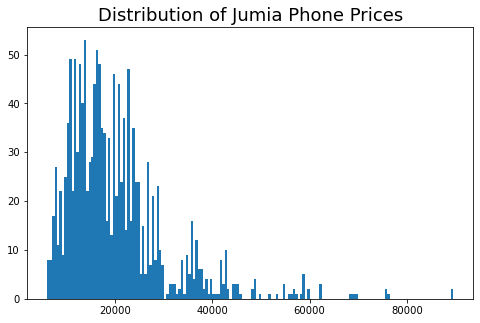

In [272]:
#trying plots
price=jumia2['Price']
plt.figure(figsize=(8,5))
plt.hist(price,bins=range(6000, 90000, 500))
plt.title('Distribution of Jumia Phone Prices',fontsize=18)
plt.ticklabel_format(style='plain',axis="x")
plt.show()

In [273]:
#most expensive phones
most_expensive_phones=jumia2[['brand','Price']].sort_values('Price',ascending=False).head(11)
most_expensive_phones=most_expensive_phones.reset_index(drop=True)
most_expensive_phones

,brand,Price
0,apple,209949
1,apple,199999
2,apple,199999
3,apple,197999
4,apple,196999
5,apple,184200
6,apple,173999
7,apple,157500
8,apple,157500
9,samsung,131099


In [436]:
#least expensive phones
least_expensive_phones=jumia2[['brand','Price']].sort_values('Price',ascending=True).head(20)
least_expensive_phones=least_expensive_phones.reset_index(drop=True)
least_expensive_phones

,brand,Price
0,itel,6340
1,itel,6340
2,itel,6350
3,itel,6350
4,itel,6356
5,itel,6380
6,itel,6399
7,itel,6499
8,itel,6595
9,itel,6600


In [276]:
#available phone brands
most_available_brand=jumia2['brand'].value_counts()
#most_available_brand.drop('',inplace=True)
most_available_brand

tecno         380
samsung       298
xiaomi        215
infinix       165
oppo           97
nokia          70
itel           61
realme         56
huawei         40
apple          31
vivo           12
blackview      12
xiaomipoco      7
poco            4
Name: brand, dtype: int64

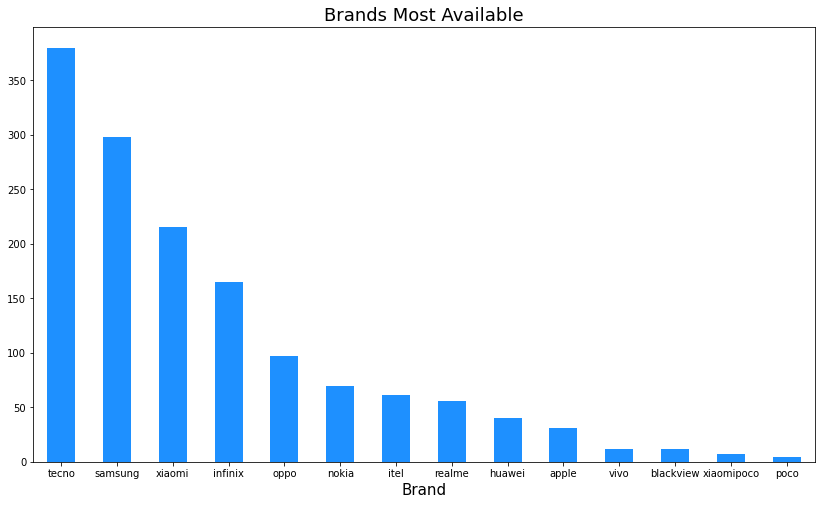

In [281]:
#plotting most available brands
plt.figure(figsize=(14,8))
most_available_brand.plot.bar(color='dodgerblue')
plt.title('Brands Most Available',fontsize=18)
plt.xlabel('Brand',fontsize=15)
plt.xticks(rotation=0)
plt.show()

In [448]:
#average price by RAM size of a phone
avg_ram_price=jumia2.groupby('ram_space2')['Price'].mean().to_frame()
avg_ram_price.sort_values('Price',ascending=False,inplace=True)
#avg_ram_price.drop('',inplace=True)
avg_ram_price

,Price
ram_space2,
12gb,93535.000000
8gb,39816.548387
6gb,36066.715976
4gb,20051.776271
3gb,15726.190000
2gb,12066.245223
1gb,7983.976190


<Figure size 864x576 with 0 Axes>

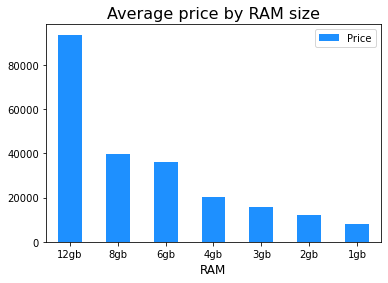

In [450]:
plt.figure(figsize=(12,8));
avg_ram_price.plot.bar(color='dodgerblue');
plt.title('Average price by RAM size',fontsize=16)
plt.xlabel('RAM',fontsize=12)
plt.xticks(rotation=0)
plt.ticklabel_format(style='plain',axis='y')
plt.show();

In [451]:
jumia2.head()

,Name,Price,brand,ram_space2,storage,battery,screen,screen2
0,"Infinix Smart 6, 6.6"", 2GB RAM, 32GB, 5000mAh,...",9999,infinix,2gb,32gb,5000mah,6.6,6.6
1,"XIAOMI Redmi A1+, 6.52"", 2GB+32GB, 8.0MP, 5000...",8999,xiaomi,2gb,32gb,5000mah,6.528.0,6.52
2,"XIAOMI Redmi 10A, 6.53"", 3GB+64GB, 13.0MP, 500...",12999,xiaomi,3gb,64gb,5000mah,6.5313.0,6.53
3,"Infinix Smart 6, 6.6"", 32GB + 2GB RAM (Dual SI...",9799,infinix,2gb,32gb,5000mah,6.6,6.6
4,"Tecno Spark 8P, 6.6"", 64GB + 4GB RAM (Dual SIM...",13830,tecno,4gb,64gb,5000mah,6.6,6.6


In [452]:
#most common rom
most_common_rom=jumia2.storage.value_counts().head()
most_common_rom

128gb    543
64gb     434
32gb     266
16gb      89
256gb     83
Name: storage, dtype: int64

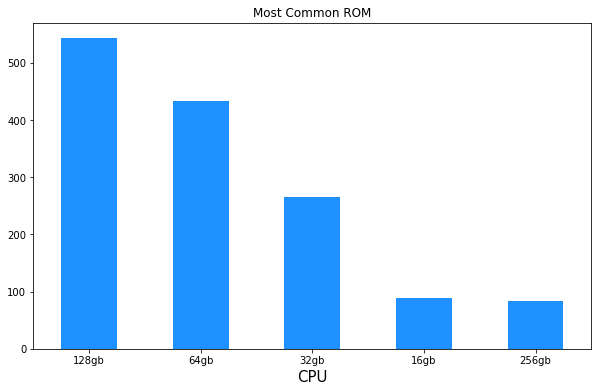

In [453]:
plt.figure(figsize=(10,6))
most_common_rom.plot.bar(color='dodgerblue')
plt.title("Most Common ROM")
plt.xlabel('CPU',fontsize=15)
plt.xticks(rotation=0)
plt.show()

In [282]:
#average price of each phone brand
avg_brand_price=jumia2.groupby('brand')['Price'].mean().to_frame()
avg_brand_price.sort_values('Price',ascending=False,inplace=True)
#avg_brand_price.drop('',inplace=True)
avg_brand_price

,Price
brand,
apple,85979.483871
oppo,27976.443299
samsung,26243.285235
poco,23824.250000
xiaomi,20996.246512
realme,18876.517857
huawei,18411.450000
xiaomipoco,17999.000000
infinix,17646.406061


<Figure size 720x432 with 0 Axes>

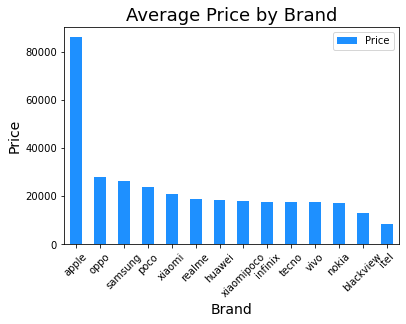

In [289]:
plt.figure(figsize=(10,6))
avg_brand_price.plot.bar(color='dodgerblue')
plt.title('Average Price by Brand',fontsize=18)
plt.xlabel('Brand',fontsize=14)
plt.ylabel('Price',fontsize=14)
plt.xticks(rotation=45)
plt.ticklabel_format(style='plain',axis='y')
plt.show()

In [464]:
#average screen size for each brand
#first convert the screen column into integer
jumia2['screen2']=jumia2['screen2'].astype(float)
jumia2['screen2'].dtype

dtype('float64')

In [465]:
avg_screen_size=jumia2.groupby('brand')['screen2'].mean().to_frame()
avg_screen_size.sort_values('screen2',ascending=False,inplace=True)
avg_screen_size

,screen2
brand,
blackview,8.807500
infinix,6.695828
realme,6.606038
xiaomipoco,6.580000
samsung,6.543902
xiaomi,6.542115
vivo,6.536364
tecno,6.504444
oppo,6.479889


<Figure size 720x432 with 0 Axes>

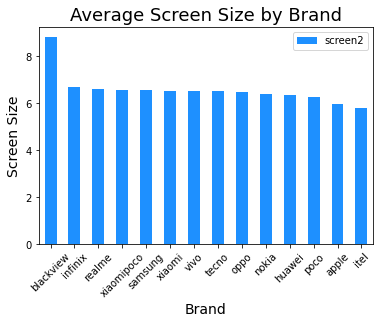

In [467]:
plt.figure(figsize=(10,6))
avg_screen_size.plot.bar(color='dodgerblue')
plt.title('Average Screen Size by Brand',fontsize=18)
plt.xlabel('Brand',fontsize=14)
plt.ylabel('Screen Size',fontsize=14)
plt.xticks(rotation=45)
plt.ticklabel_format(style='plain',axis='y')
plt.show()

In [ ]:
#

In [469]:
#most common battery size
battery_size=jumia2['battery'].value_counts().to_frame()
battery_size

,battery
5000mah,744
6000mah,94
4000mah,59
4500mah,29
4230mah,17
5050mah,16
3020mah,10
2400mah,8
4323mah,5
3000mah,5


<Figure size 1008x576 with 0 Axes>

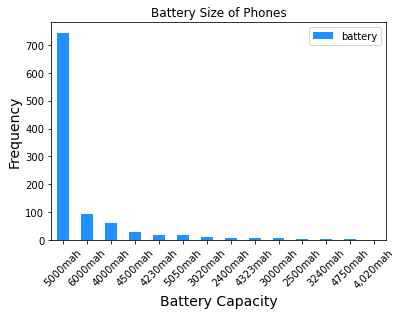

In [472]:
#specify figure size
plt.figure(figsize=(14,8))
#the actual plotting
battery_size.plot.bar(color='dodgerblue')
#title and labels
plt.title('Battery Size of Phones')
plt.xlabel('Battery Capacity',fontsize=14)
plt.ylabel('Frequency',fontsize=14)
plt.xticks(rotation=45)
plt.ticklabel_format(style='plain',axis='y')
#show the plot
plt.show()

In [461]:
#most common screen size
screen_size=jumia2['screen3'].value_counts().to_frame()
screen_size

,screen3
6.5,425
6.6,406
6.8,171
6.4,117
6.7,71
6.1,33
6,31
5.5,25
5.4,18
5.7,15


<Figure size 1296x720 with 0 Axes>

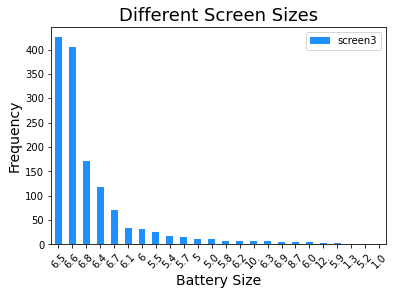

In [475]:
plt.figure(figsize=(18,10))
screen_size.plot.bar(color="dodgerblue")
plt.title("Different Screen Sizes",fontsize=18)
plt.xlabel('Battery Size',fontsize=14)
plt.ylabel('Frequency',fontsize=14)
plt.xticks(rotation=45)
plt.ticklabel_format(style='plain',axis='y')
plt.show()